Autism spectrum disorder (ASD) is a neurological and developmental disorder that affects how people interact with others, communicate, learn, and behave. Functional magnetic resonance imaging(fMRI) is a non-invasive and reliable tool for revealing brain function.
It is well known that spontaneous fluctuations in the blood oxygenation level-dependent (BOLD) signal, as measured by fMRI, present a valuable data resource for delineating the human neural functional architecture. fMRI, including rs-fMRI and task-based fMRI, has become one of the primary tools of cognitive neuroscience.
Studies have shown that healthy brain intrinsic connectivity is altered in the autistic brain, with reports of general over-connectivity, under-connectivity, and/or a combination of both. 

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from os.path import dirname, join as pjoin
import scipy.io as sio

In [5]:
data_dir_ASD = pjoin(dirname(sio.__file__), '/data/Training Data/ASD')
data_dir_Normal = pjoin(dirname(sio.__file__), '/data/Training Data/Normal')

In [9]:
from nilearn import datasets

with open("../data/Harvard-Oxford Atlas (Label of Brain Regions).csv") as file:
    dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_ho_filename = dataset_ho.filename


Added README.md to /users/ntolley/nilearn_data


Dataset created in /users/ntolley/nilearn_data/fsl



 ...done. (1 seconds, 0 min)
Extracting data from /users/ntolley/nilearn_data/fsl/c4d84bbdf5c3325f23e304cdea1e9706/HarvardOxford.tgz..... done.


# Visualization of Harvard Oxford Atlas:

The whole brain fMRI is usually parcellated into ROIs defined by different atlases, which are either anatomically defined or functionally defined. Harvard Oxford atlas is an anatomical atlas in which the brain is divided into 110 regions.

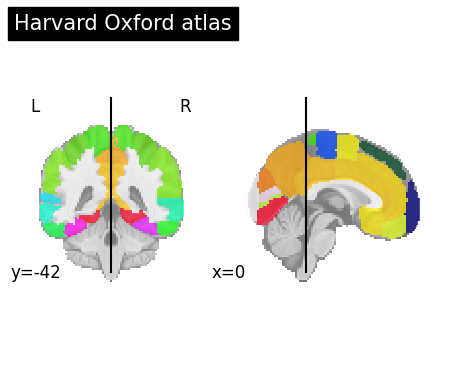

In [27]:
from nilearn import plotting
from nilearn import image

atlas_ho_filename = image.smooth_img('/users/ntolley/nilearn_data/fsl/data/atlases/HarvardOxford/HarvardOxford-cort-maxprob-thr25-2mm.nii', None)

def changeDisplayMode(mode):
    plotting.plot_roi(atlas_ho_filename, title="Harvard Oxford atlas", display_mode=mode)

changeDisplayMode("yx")

/users/ntolley/.conda/envs/metanets/lib/python3.10/site-packages/nilearn/plotting/img_plotting.py:817: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  img = new_img_like(roi_img, data, affine=roi_img.affine)


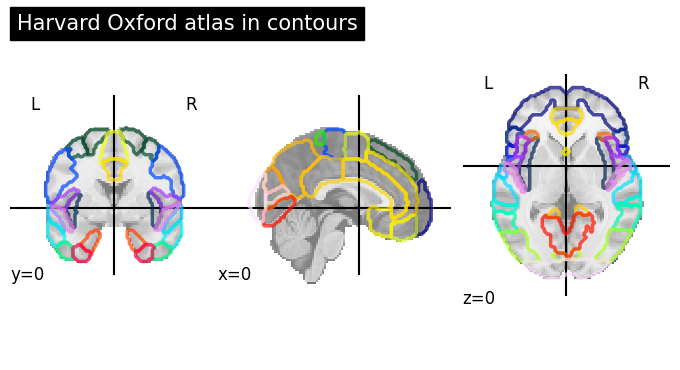

In [28]:
plotting.plot_roi(
    atlas_ho_filename,
    view_type="contours",
    title="Harvard Oxford atlas in contours",
)
plotting.show()

# Representation  of a BOLD signal of a region for ASD and Normal:

In [14]:
dataASD=pd.read_csv('../data/Training Data/ASD/ASD Subject 01.csv')
dataNormal=pd.read_csv('../data/Training Data/Normal/Normal Subject 01.csv')

In [15]:
dfASD=dataASD.drop(columns='Unnamed: 0')
dfNormal=dataNormal.drop(columns='Unnamed: 0')

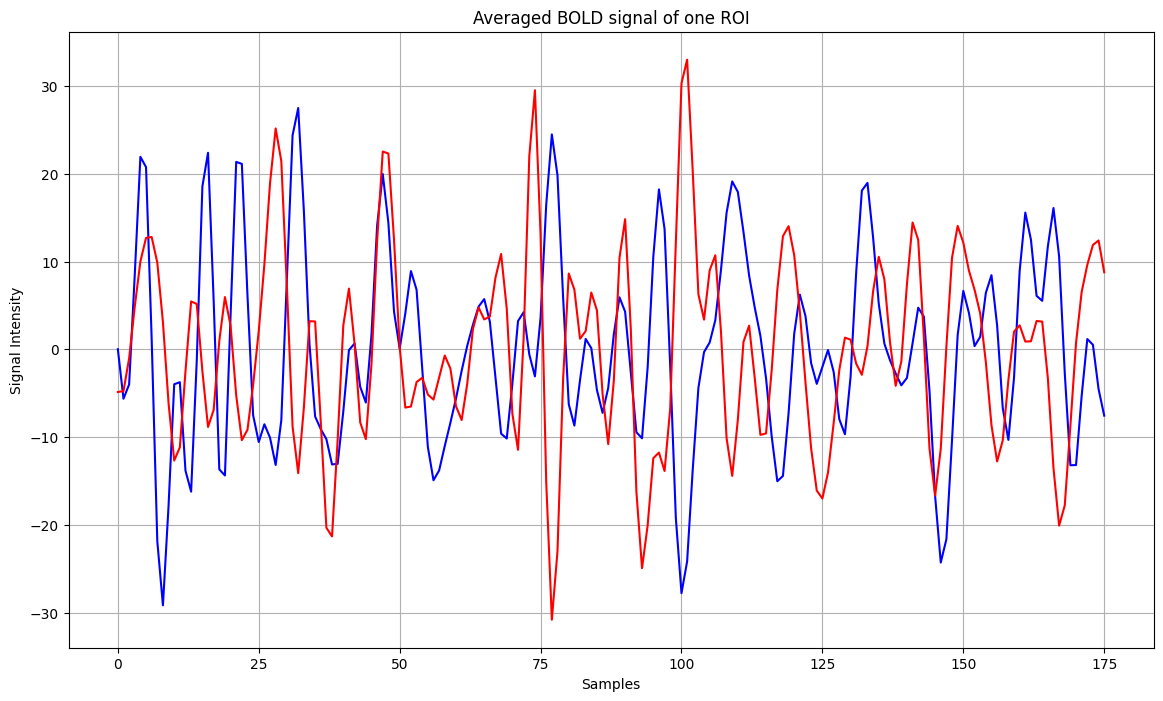

In [16]:
plt.figure(figsize=[14,8])
plt.plot(dfNormal.iloc[:,1],color="blue")
plt.plot(dfASD.iloc[:,1],color="red")
plt.xlabel("Samples")
plt.ylabel("Signal Intensity")
plt.title("Averaged BOLD signal of one ROI")
plt.grid()
plt.show()

# Funtional Connectivity:

Functional connectivity refers to the statistical relationship between specific physiological signals in time and are generally assessed using techniques such as functional magnetic resonance imaging (fMRI), electroencephalography (EEG) or magnetic electroencephalography (MEG).

In [17]:
dfASD.shape

(176, 110)

In [19]:
import glob
Normal_group = np.zeros ([50, 176, 110])
path = '../data/Training Data/Normal'
filenames = glob.glob(path + "/*.csv")
for filename in filenames:
    for i in range(1,50):
        dfs= pd.read_csv(filename)
        df=dfs.drop(columns='Unnamed: 0')
        Normal_group [i::] = df
    

In [20]:
ASD_group = np.zeros ([50, 176, 110])
path = '../data/Training Data/ASD'
filenames = glob.glob(path + "/*.csv")
for filename in filenames:
    for i in range(1,50):
        dfs= pd.read_csv(filename)
        df=dfs.drop(columns='Unnamed: 0')
        ASD_group [i::] = df

In [21]:
print(Normal_group.shape)
print(ASD_group.shape)

(50, 176, 110)
(50, 176, 110)


In [22]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')

In [23]:
correlation_matrices_Normal = correlation_measure.fit_transform(Normal_group) 
print('Correlations of Healthy Controls are stacked in an array of shape {0}'
      .format(correlation_matrices_Normal.shape))

correlation_matrices_ASD = correlation_measure.fit_transform(ASD_group) 
# All individual coefficients are stacked in a unique 2D matrix.
print('Correlations of Multiple Sclerosis  are stacked in an array of shape {0}'
      .format(correlation_matrices_ASD.shape))

Correlations of Healthy Controls are stacked in an array of shape (50, 110, 110)
Correlations of Multiple Sclerosis  are stacked in an array of shape (50, 110, 110)


/users/ntolley/.conda/envs/metanets/lib/python3.10/site-packages/nilearn/connectome/connectivity_matrices.py:345: RuntimeWarning: divide by zero encountered in divide
  diagonal = np.atleast_2d(1.0 / np.sqrt(np.diag(covariance)))
/users/ntolley/.conda/envs/metanets/lib/python3.10/site-packages/nilearn/connectome/connectivity_matrices.py:346: RuntimeWarning: invalid value encountered in multiply
  correlation = covariance * diagonal * diagonal.T
/users/ntolley/.conda/envs/metanets/lib/python3.10/site-packages/nilearn/connectome/connectivity_matrices.py:345: RuntimeWarning: divide by zero encountered in divide
  diagonal = np.atleast_2d(1.0 / np.sqrt(np.diag(covariance)))
/users/ntolley/.conda/envs/metanets/lib/python3.10/site-packages/nilearn/connectome/connectivity_matrices.py:346: RuntimeWarning: invalid value encountered in multiply
  correlation = covariance * diagonal * diagonal.T


In [24]:
mean_correlation_ASD = np.mean([correlation_matrices_ASD[j] for j in range(1,50)], axis = 0)
mean_correlation_Normal = np.mean([correlation_matrices_Normal[j] for j in range(1,50)], axis = 0)

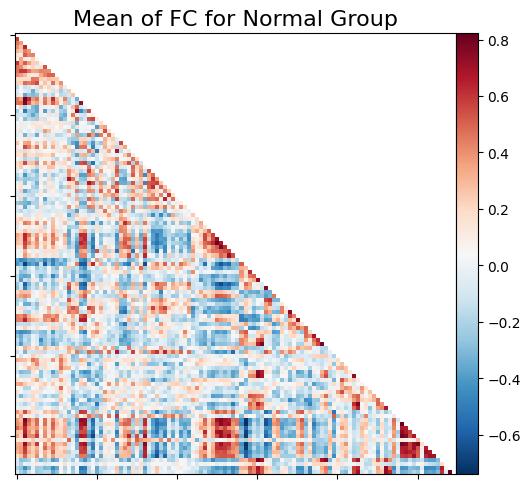

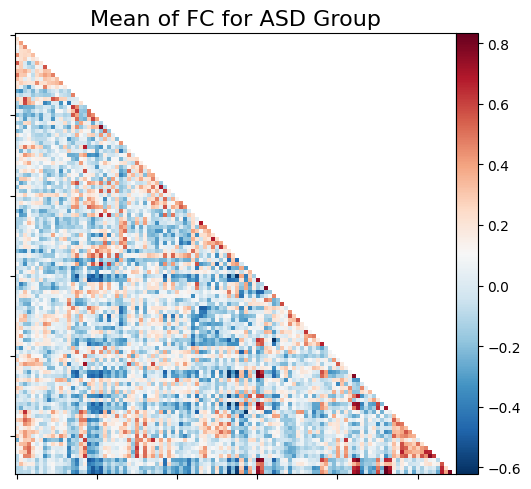

In [25]:
from nilearn import plotting
plotting.plot_matrix(mean_correlation_Normal, colorbar=True, tri='lower', title="Mean of FC for Normal Group")
plotting.plot_matrix(mean_correlation_ASD, colorbar=True, tri='lower', title="Mean of FC for ASD Group")

In [ ]:
coords= pd.read_csv('/kaggle/input/ho-coord/coords.csv')
plotting.plot_connectome(mean_correlation_ASD, coords,colorbar=True,
                         title='ASD')

plotting.show()

In [ ]:
plotting.plot_connectome(mean_correlation_Normal, coords,colorbar=True,
                         title='Normal Group')

plotting.show()